# Analysis of Medical Charges: Exploring Factors Affecting Medical Costs

In [1]:
# Load packages
library(dplyr)
library(ggplot2)
library(reshape2)


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




In [2]:
file_path <- '../data/insurance.csv'
ins_data <- read.csv(file_path)

### Exploratory Data Analysis

In [3]:
# Check for successful read of CSV file
head(ins_data)

,age,sex,bmi,children,smoker,region,charges
,<int>,<chr>,<dbl>,<int>,<chr>,<chr>,<dbl>
1,19,female,27.900,0,yes,southwest,16884.924
2,18,male,33.770,1,no,southeast,1725.552
3,28,male,33.000,3,no,southeast,4449.462
4,33,male,22.705,0,no,northwest,21984.471
5,32,male,28.880,0,no,northwest,3866.855
6,31,female,25.740,0,no,southeast,3756.622


The independent variables to observed are age, sex, body mass index (BMI), number of children, smoker status and region.

In [4]:
# Get unique number of regions
unique_region <- unique(ins_data$region)
print(unique_region)

[1] "southwest" "southeast" "northwest" "northeast"


There are four unique regions for this dataset.

In [5]:
# Count the number of rows with at least one null entry
null_row_count <- sum(!complete.cases(ins_data))

# Print the number of rows with at least one null entry
print(null_row_count)

[1] 0


No null entries are listed in this dataset.

In [6]:
summary(ins_data)
print(paste("Number of rows:", dim(ins_data)[1]))

      age            sex                 bmi           children    
 Min.   :18.00   Length:1338        Min.   :15.96   Min.   :0.000  
 1st Qu.:27.00   Class :character   1st Qu.:26.30   1st Qu.:0.000  
 Median :39.00   Mode  :character   Median :30.40   Median :1.000  
 Mean   :39.21                      Mean   :30.66   Mean   :1.095  
 3rd Qu.:51.00                      3rd Qu.:34.69   3rd Qu.:2.000  
 Max.   :64.00                      Max.   :53.13   Max.   :5.000  
    smoker             region             charges     
 Length:1338        Length:1338        Min.   : 1122  
 Class :character   Class :character   1st Qu.: 4740  
 Mode  :character   Mode  :character   Median : 9382  
                                       Mean   :13270  
                                       3rd Qu.:16640  
                                       Max.   :63770  

[1] "Number of rows: 1338"


We can observe that the average amount for healthcare charges is 13,270 USD. The max is 63,770 USD which is significantly higher than the mean. The next step will be to remove outliers.

### Removing Outliers

In [7]:
# Calculate interquartile range
iqr_charges <- IQR(ins_data$charges)

# Calculate lower and upper bounds for charges outliers
lower_bound_charges <- quantile(ins_data$charges, 0.25) - 1.5 * iqr_charges
upper_bound_charges <- quantile(ins_data$charges, 0.75) + 1.5 * iqr_charges

# Filter cost data
ins_data <- ins_data[ins_data$charges >= lower_bound_charges & ins_data$charges <= upper_bound_charges, ]

print(paste("Number of rows:", dim(ins_data)[1]))

[1] "Number of rows: 1199"


Removing outliers only resulted in losing 139 rows of data. There are still 1199 rows of data remaining.

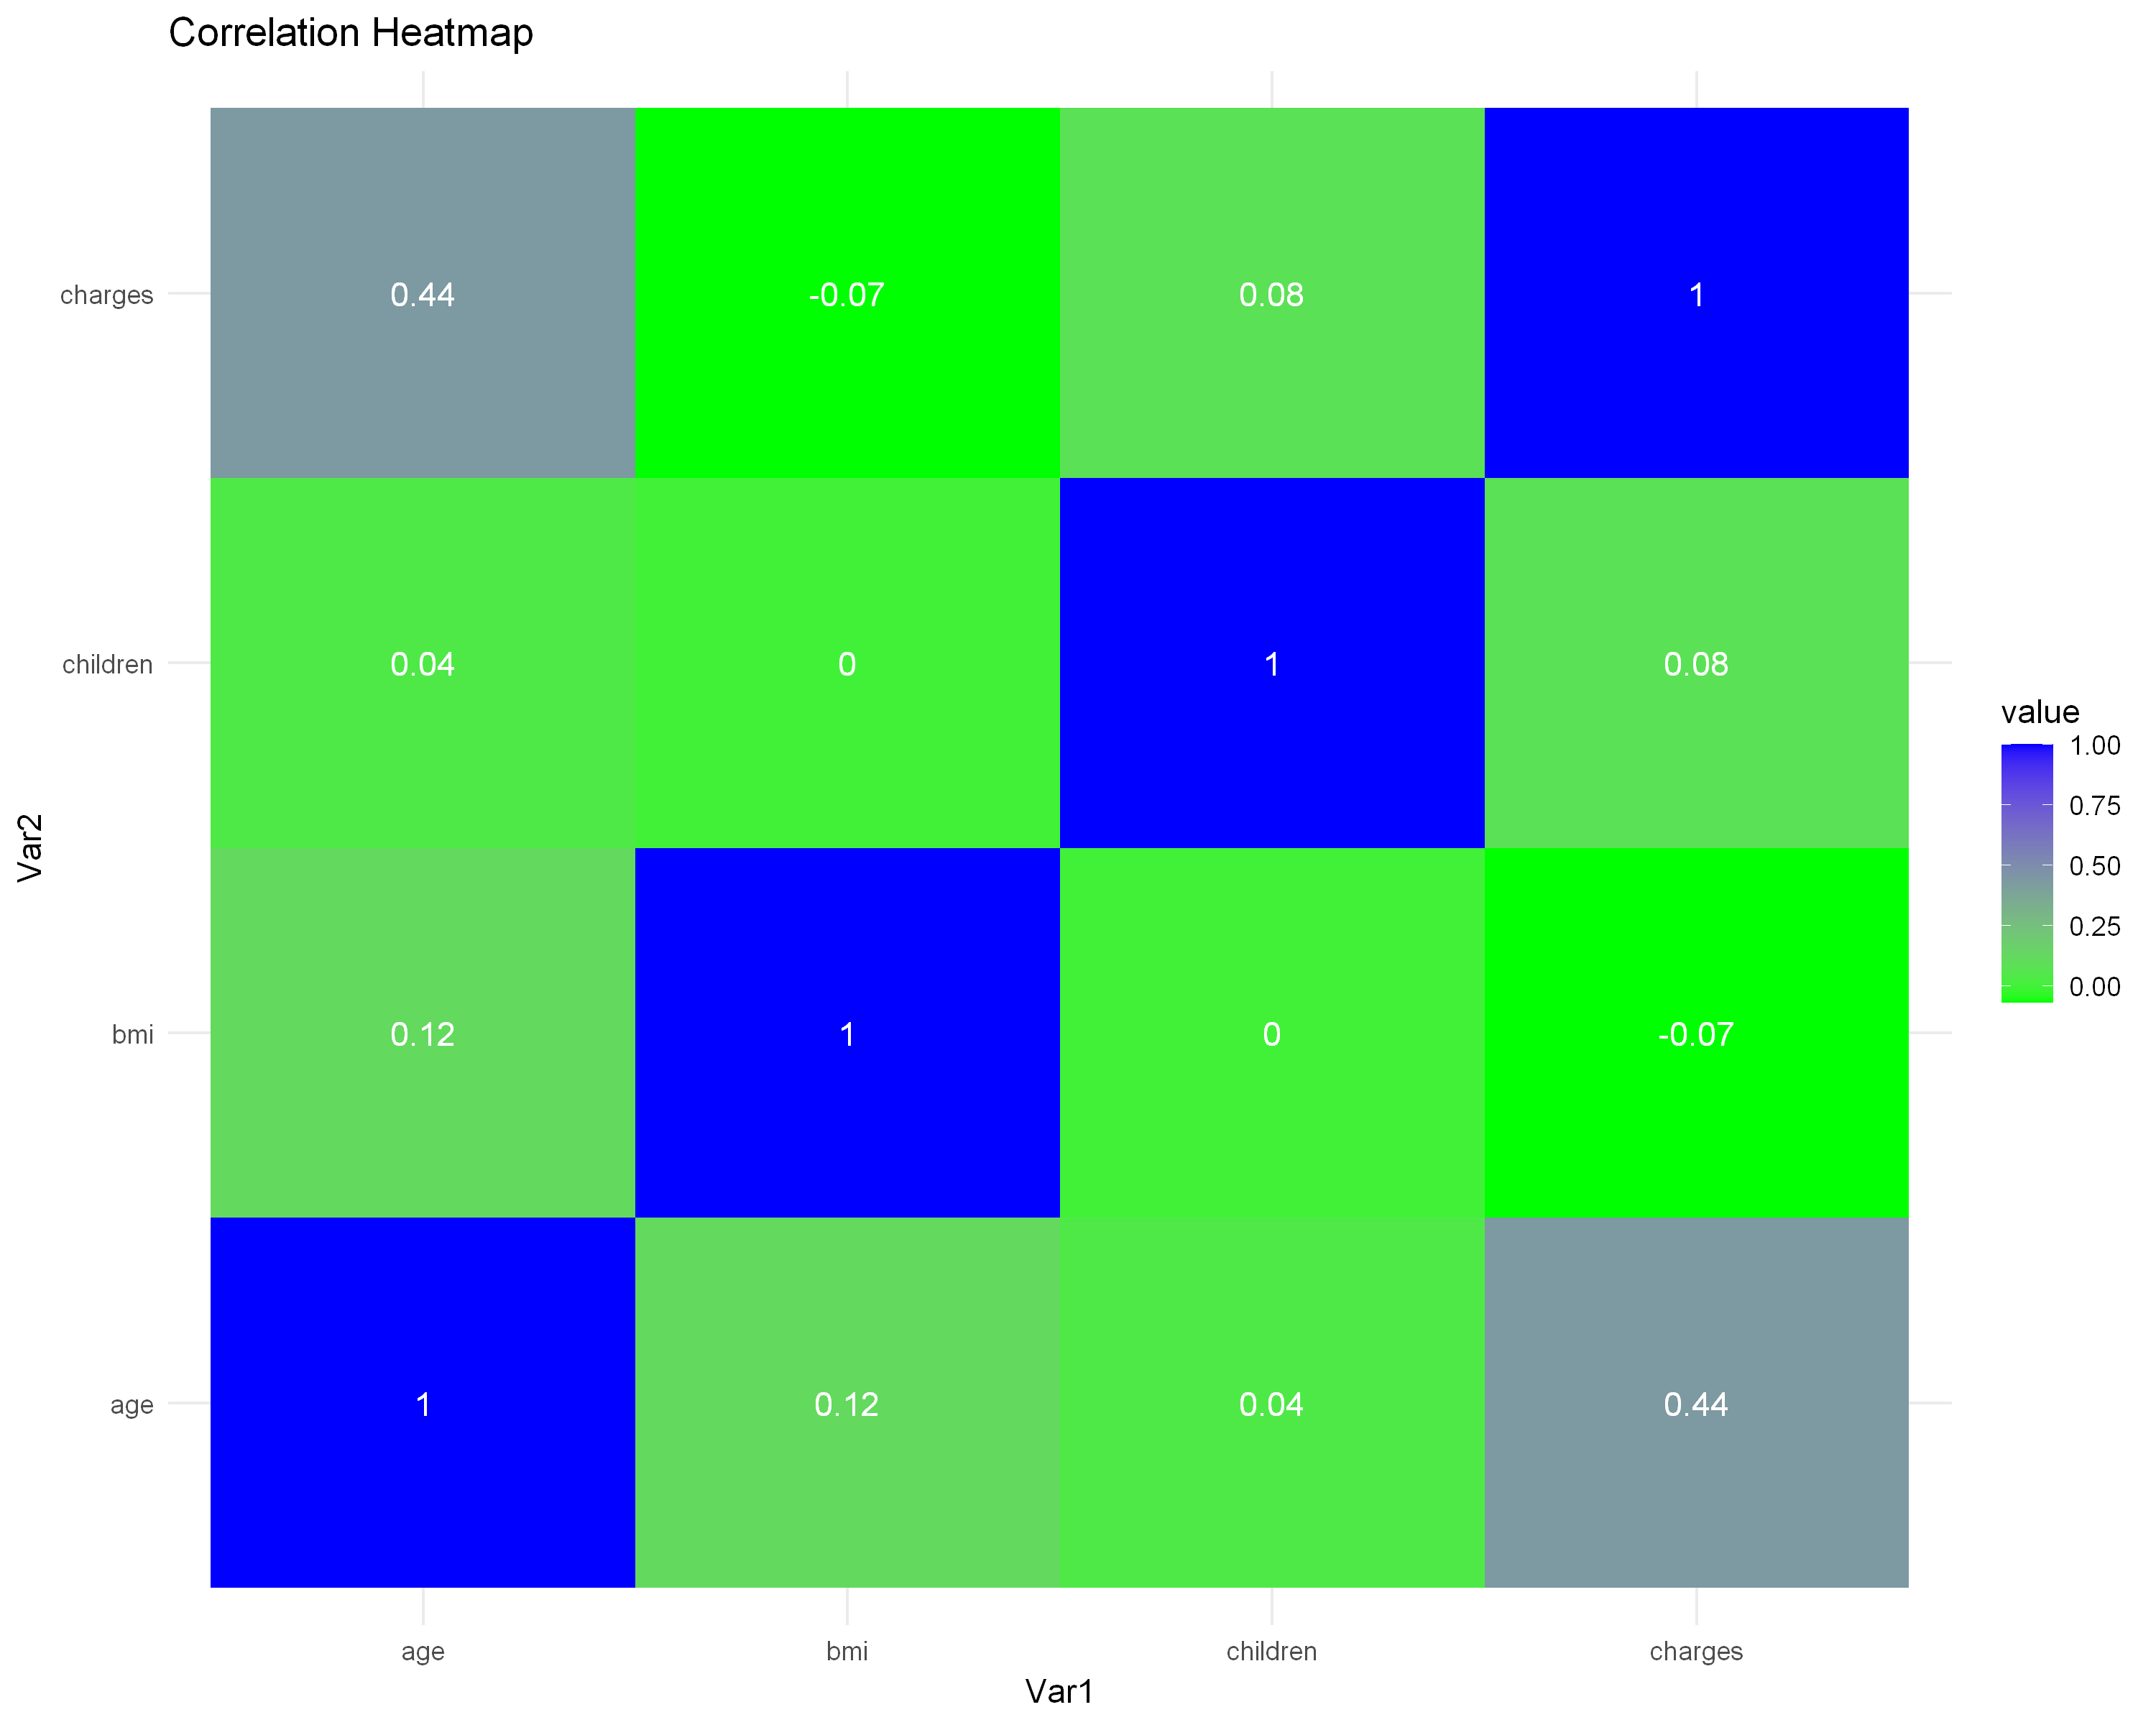

In [8]:
# Filter for only numeric variables
numeric_ins_data <- ins_data[, sapply(ins_data, is.numeric)]

# Create correlation matrix
corr_matrix <- cor(numeric_ins_data)
corr_long <- melt(corr_matrix)

options(repr.plot.width = 10, repr.plot.height = 8, repr.plot.res = 300)

# Create a heatmap
ggplot(data = corr_long, aes(x = Var1, y = Var2, fill = value)) +
    geom_tile() +
    scale_fill_gradient(low = "green", high = "blue") +
    geom_text(aes(label = round(value, 2)), color = "white") +
    theme_minimal() +
    labs(title = "Correlation Heatmap")

The data does not appear to show very strong correlations between most our numerical data. The strongest correlation is between charges and age with a correlation coefficient of 0.44.

### How do medical costs differ by region in the United States?

region,mean_charges
<chr>,<dbl>
northeast,10736.263
northwest,10363.593
southeast,9574.281
southwest,9021.451


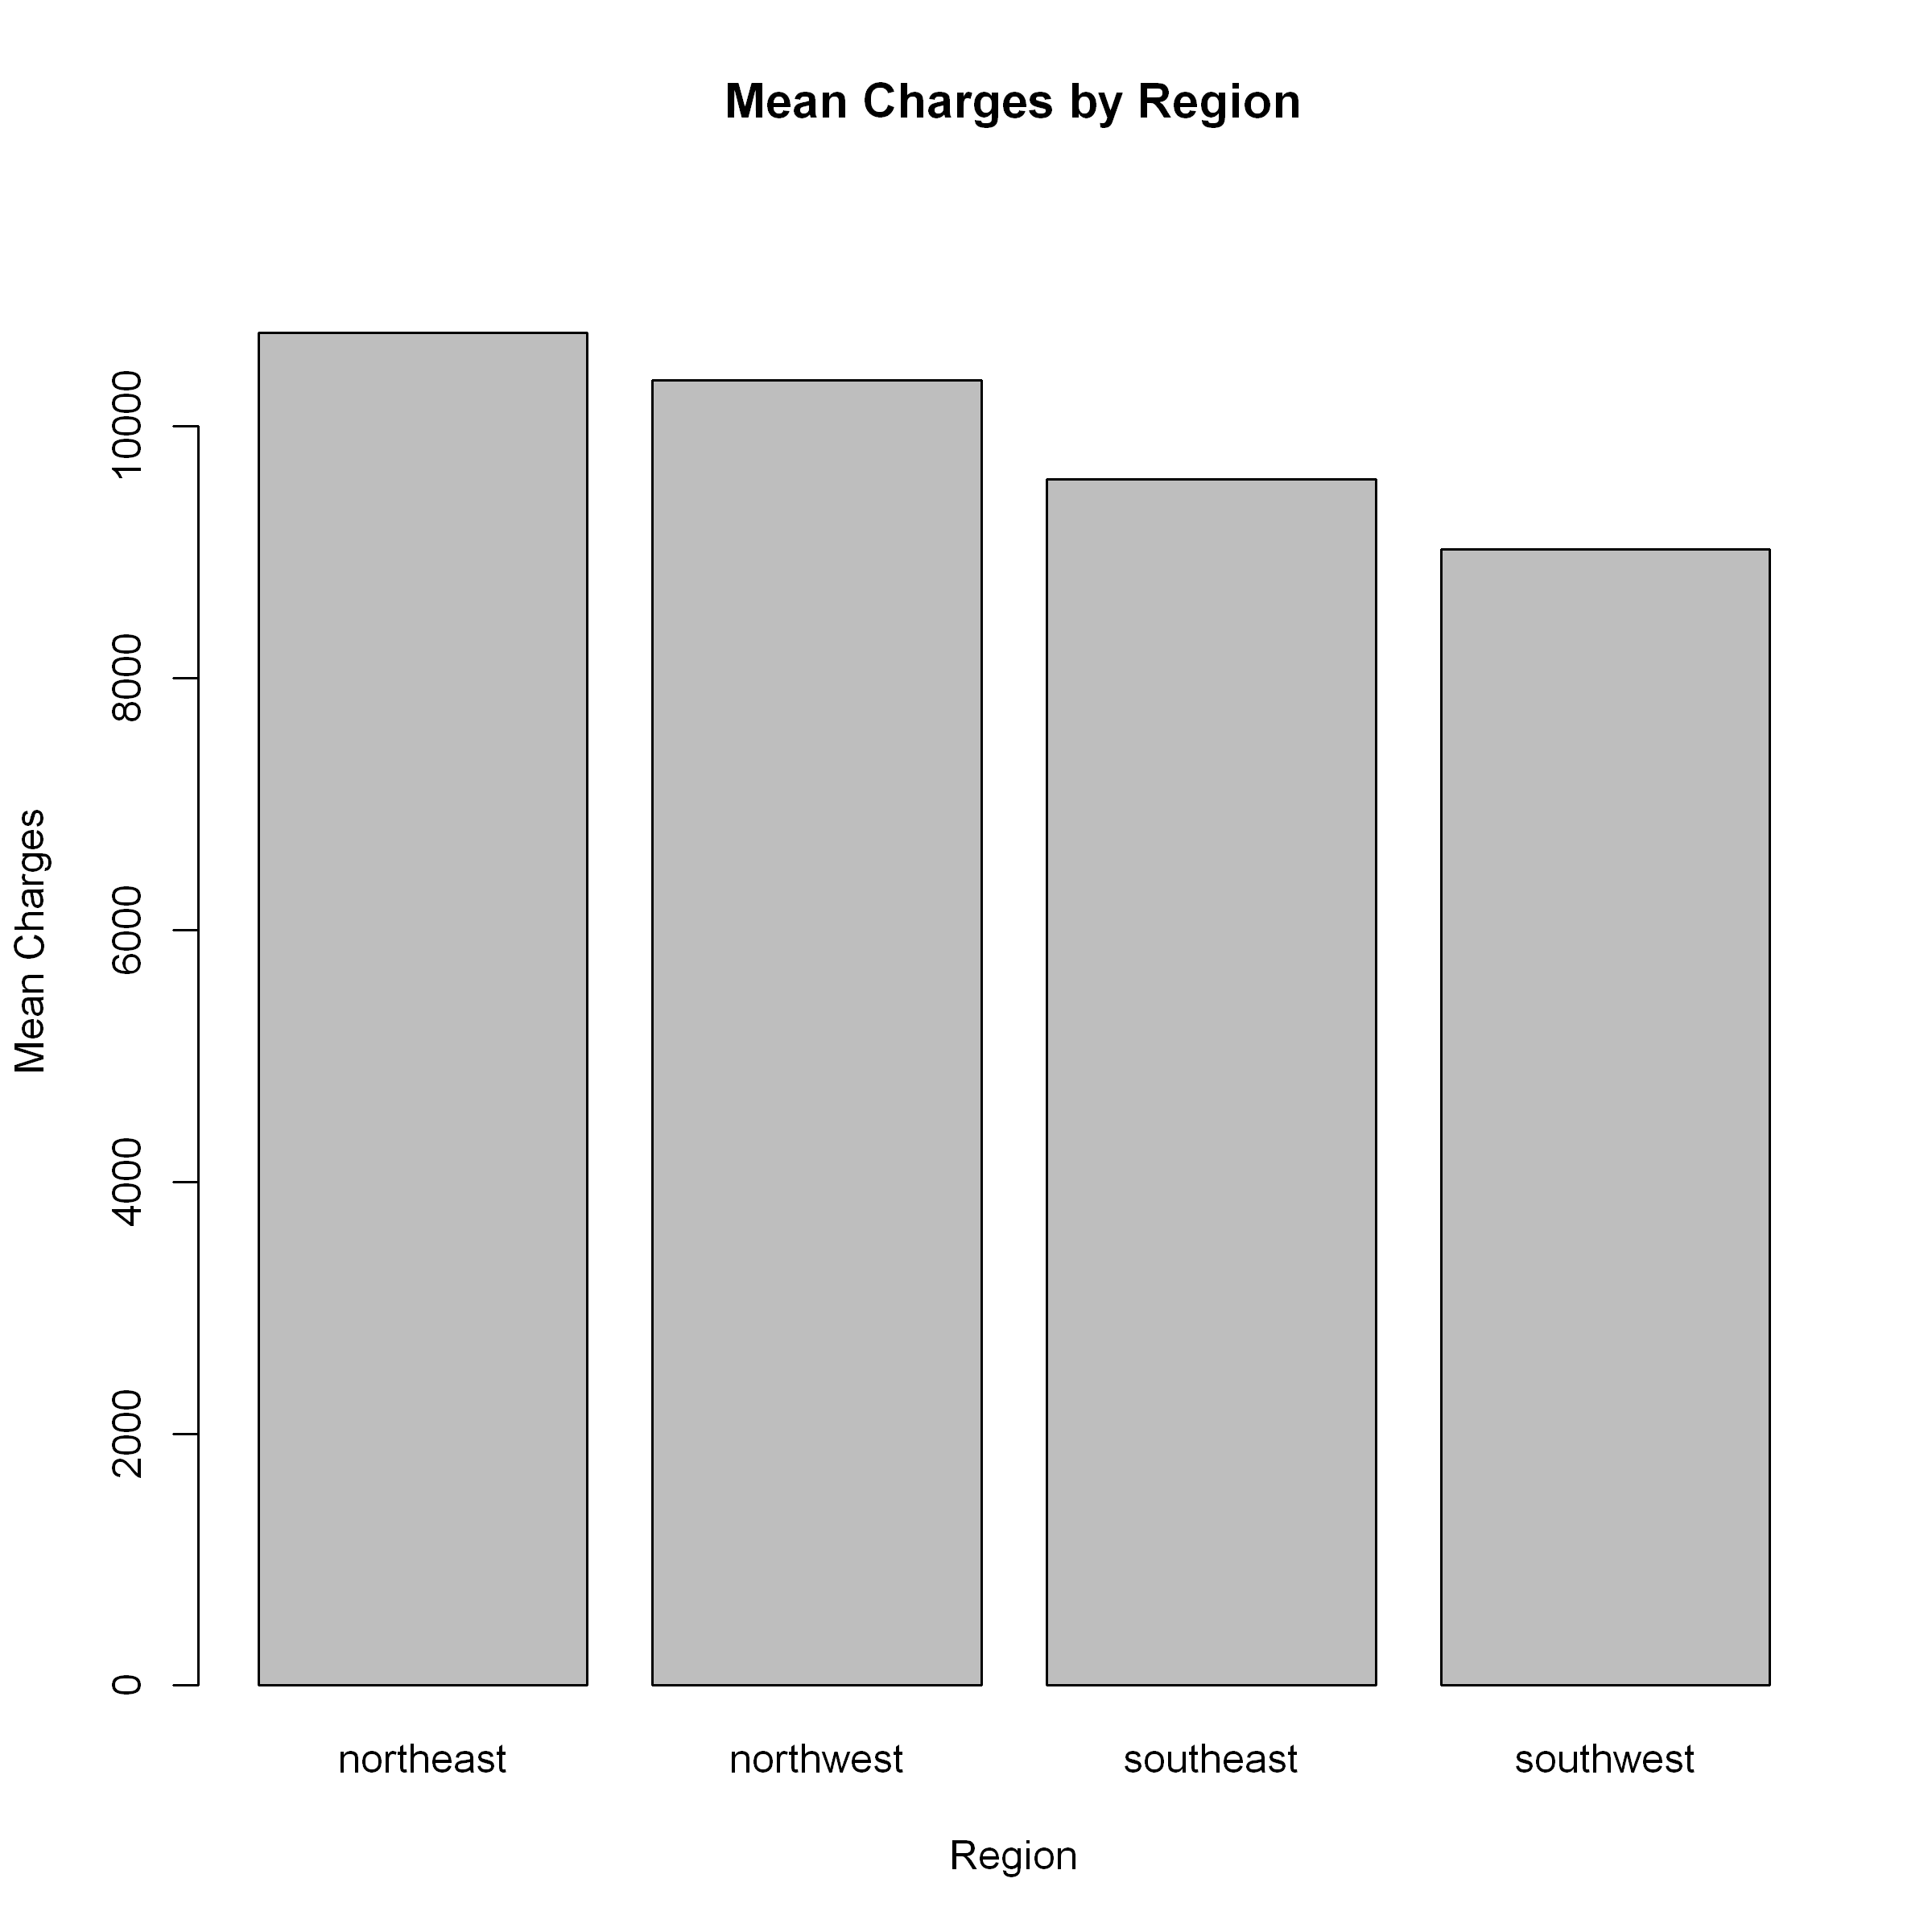

In [9]:
# Group data by region
grouped_region <- group_by(ins_data, region)

# Get mean of charges by region
region_sum_mean <- summarize(grouped_region, mean_charges = mean(charges))

options(repr.plot.width = 8, repr.plot.height = 8, repr.plot.res = 300)

barplot(region_sum_mean$mean_charges, names.arg = region_sum_mean$region, 
        main = "Mean Charges by Region",
        xlab = "Region",
        ylab = "Mean Charges",
        ylim = c(0, max(region_sum_mean$mean_charges) * 1.1)
       )

region_sum_mean

region,median_charges
<chr>,<dbl>
northeast,9440.088
northwest,8310.839
southeast,7804.160
southwest,7954.517


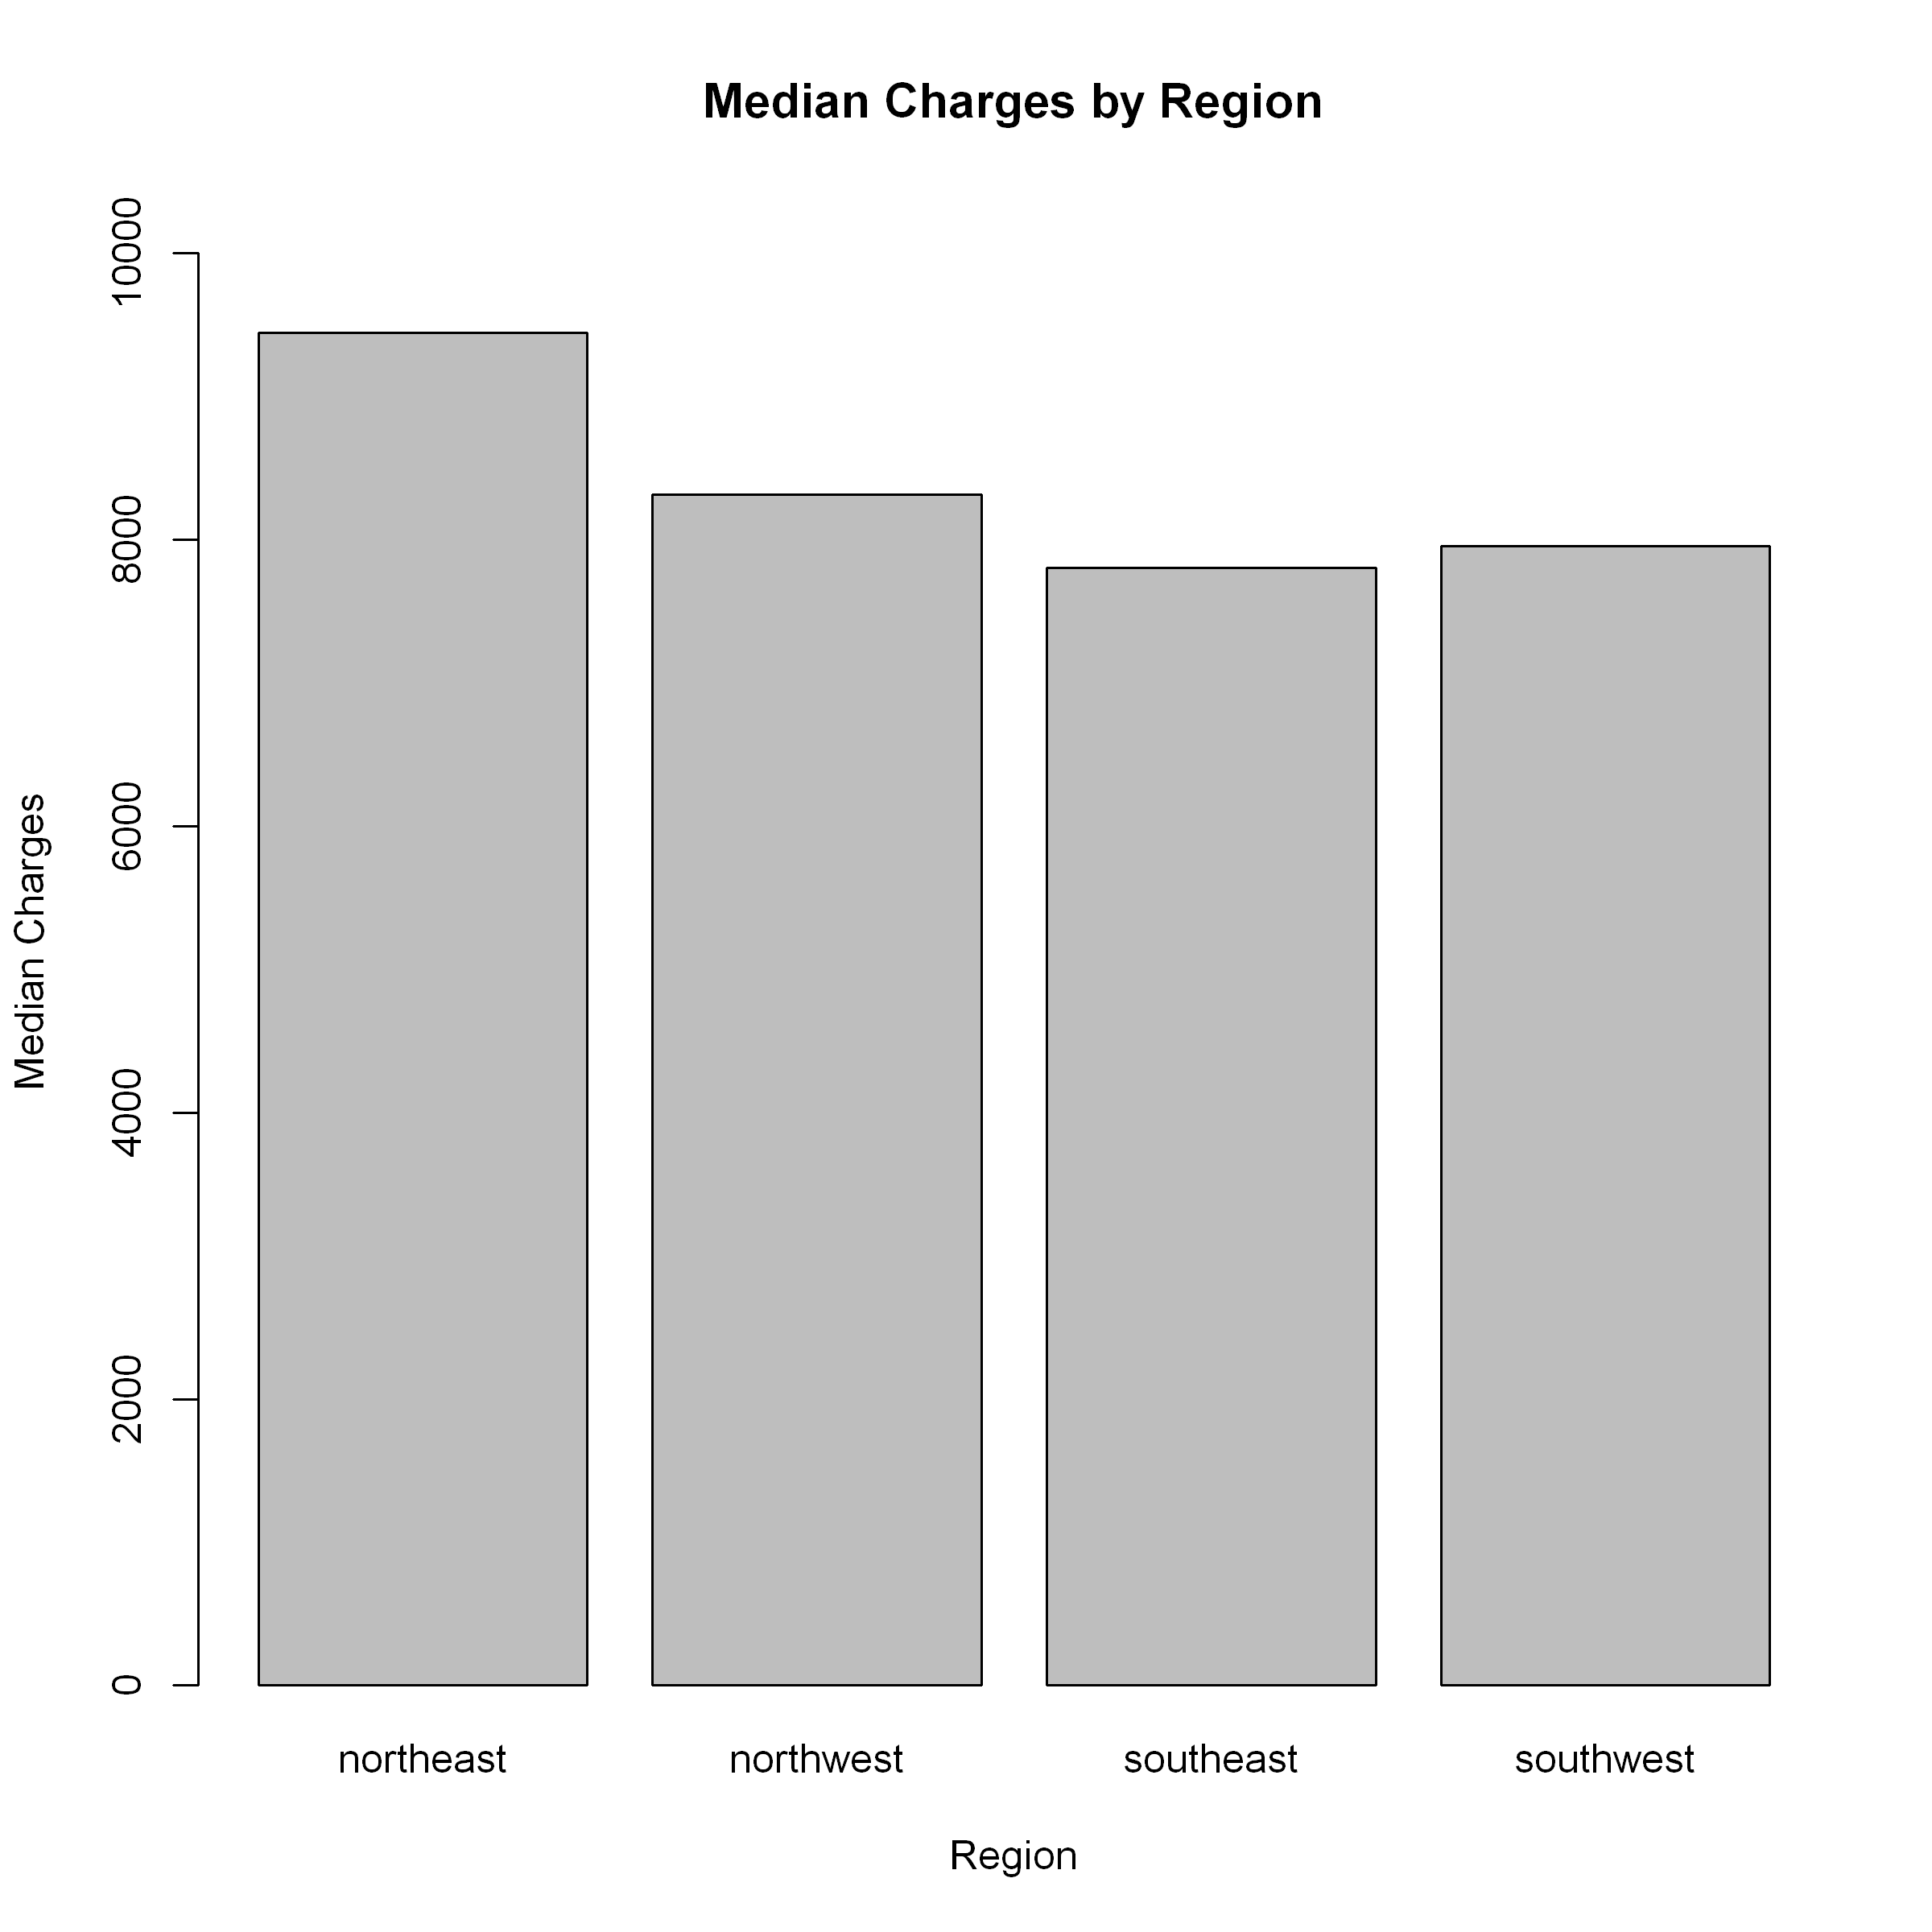

In [10]:
# Get median of medical charges by region
region_sum_med <- summarize(grouped_region, median_charges = median(charges))

options(repr.plot.width = 8, repr.plot.height = 8, repr.plot.res = 300)

barplot(region_sum_med$median_charges, names.arg = region_sum_med$region, 
        main = "Median Charges by Region",
        xlab = "Region",
        ylab = "Median Charges",
        ylim = c(0, max(region_sum_med$median_charges) * 1.1)
        )

region_sum_med

The region with the highest average medical cost is the Northeast with an average of 10,736.263 USD. The Southwest has the cheapest average cost with an average of 9,021.45 USD. The Southeast had the lowest medical charges when observing the median charges for each region. The Southeast had a median charge of 7,804.16 USD while the Northeast had the highest median charge of 9,440.08 USD.

This variation could be influenced by factors such as regional healthcare policies, healthcare quality, provider reimbursement rates, or differences in the cost of living as the Northeast tends to have a higher cost of living.

### How does smoker status affect medical costs?

smoker,mean_charges
<chr>,<dbl>
no,8355.712
yes,22014.246


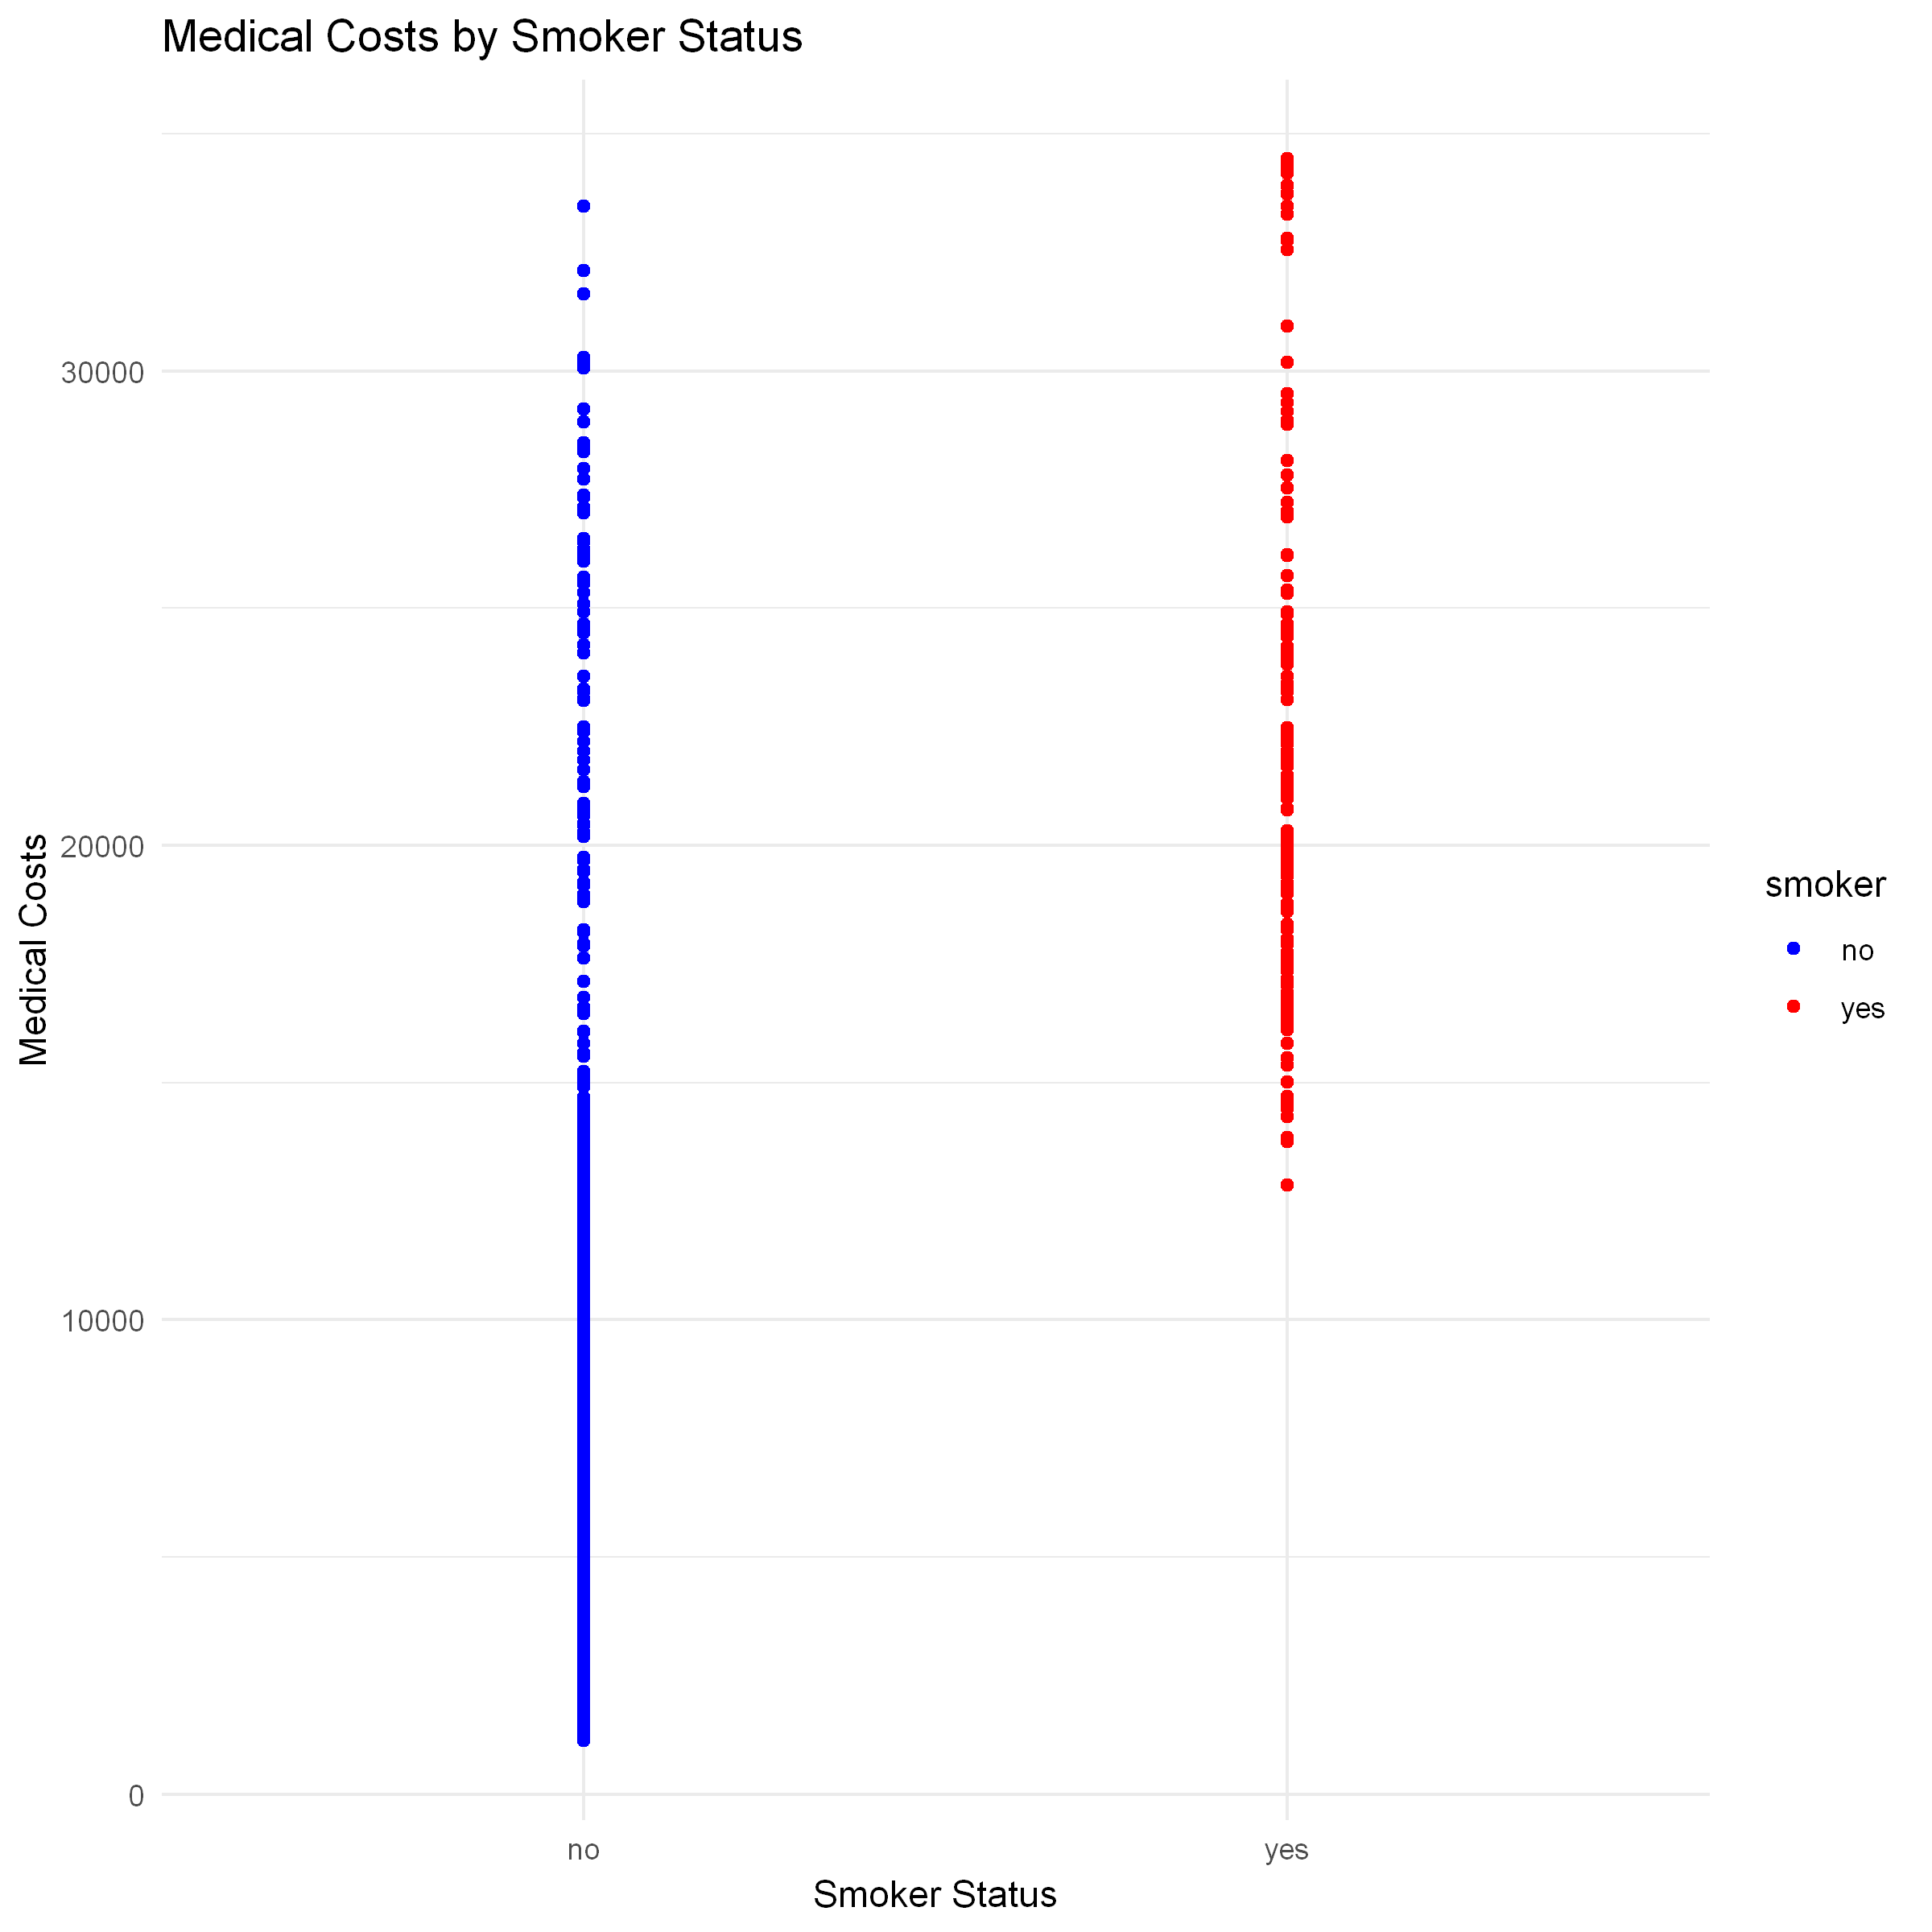

In [11]:
# Group smokers together
grouped_smoker <- group_by(ins_data, smoker)

# Get mean of medical charges for smokers and non-smokers
smoker_sum <- summarize(grouped_smoker, mean_charges = mean(charges))

smoker_sum

options(repr.plot.width = 8, repr.plot.height = 8, repr.plot.res = 300)

ggplot(data = ins_data, aes(x = smoker, y = charges, color = smoker)) +
  geom_point() +
  labs(title = "Medical Costs by Smoker Status", x = "Smoker Status", y = "Medical Costs") +
  scale_color_manual(values = c("blue", "red")) +
  theme_minimal()

There is a significant difference in the average medical costs of smokers versus non-smokers. The average medical cost for a smoker is 22,014.24 USD while the average cost for a non-smoker is 8,355.71 USD. The scatter plot above shows that the distribution of dots for smokers is much higher on the medical costs scale.

In [12]:
# Group by smoker status and then by region
grouped_reg_smoke <- group_by(ins_data, smoker, region)

rs_count <- summarize(grouped_reg_smoke, counts = n())

rs_count

`summarise()` has grouped output by 'smoker'. You can override using the `.groups` argument.


smoker,region,counts
<chr>,<chr>,<int>
no,northeast,257
no,northwest,267
no,southeast,272
no,southwest,265
yes,northeast,39
yes,northwest,38
yes,southeast,35
yes,southwest,26


After grouping the smokers and non-smokers by region, the sample data shows that the Northeast had the highest number of smokers followed by the Northwest. This provides potential insight into factors that contribute to the Northeast having higher average medical costs since the data shows smokers have higher charges.

### How do medical costs differ by age group and body mass index (BMI)?

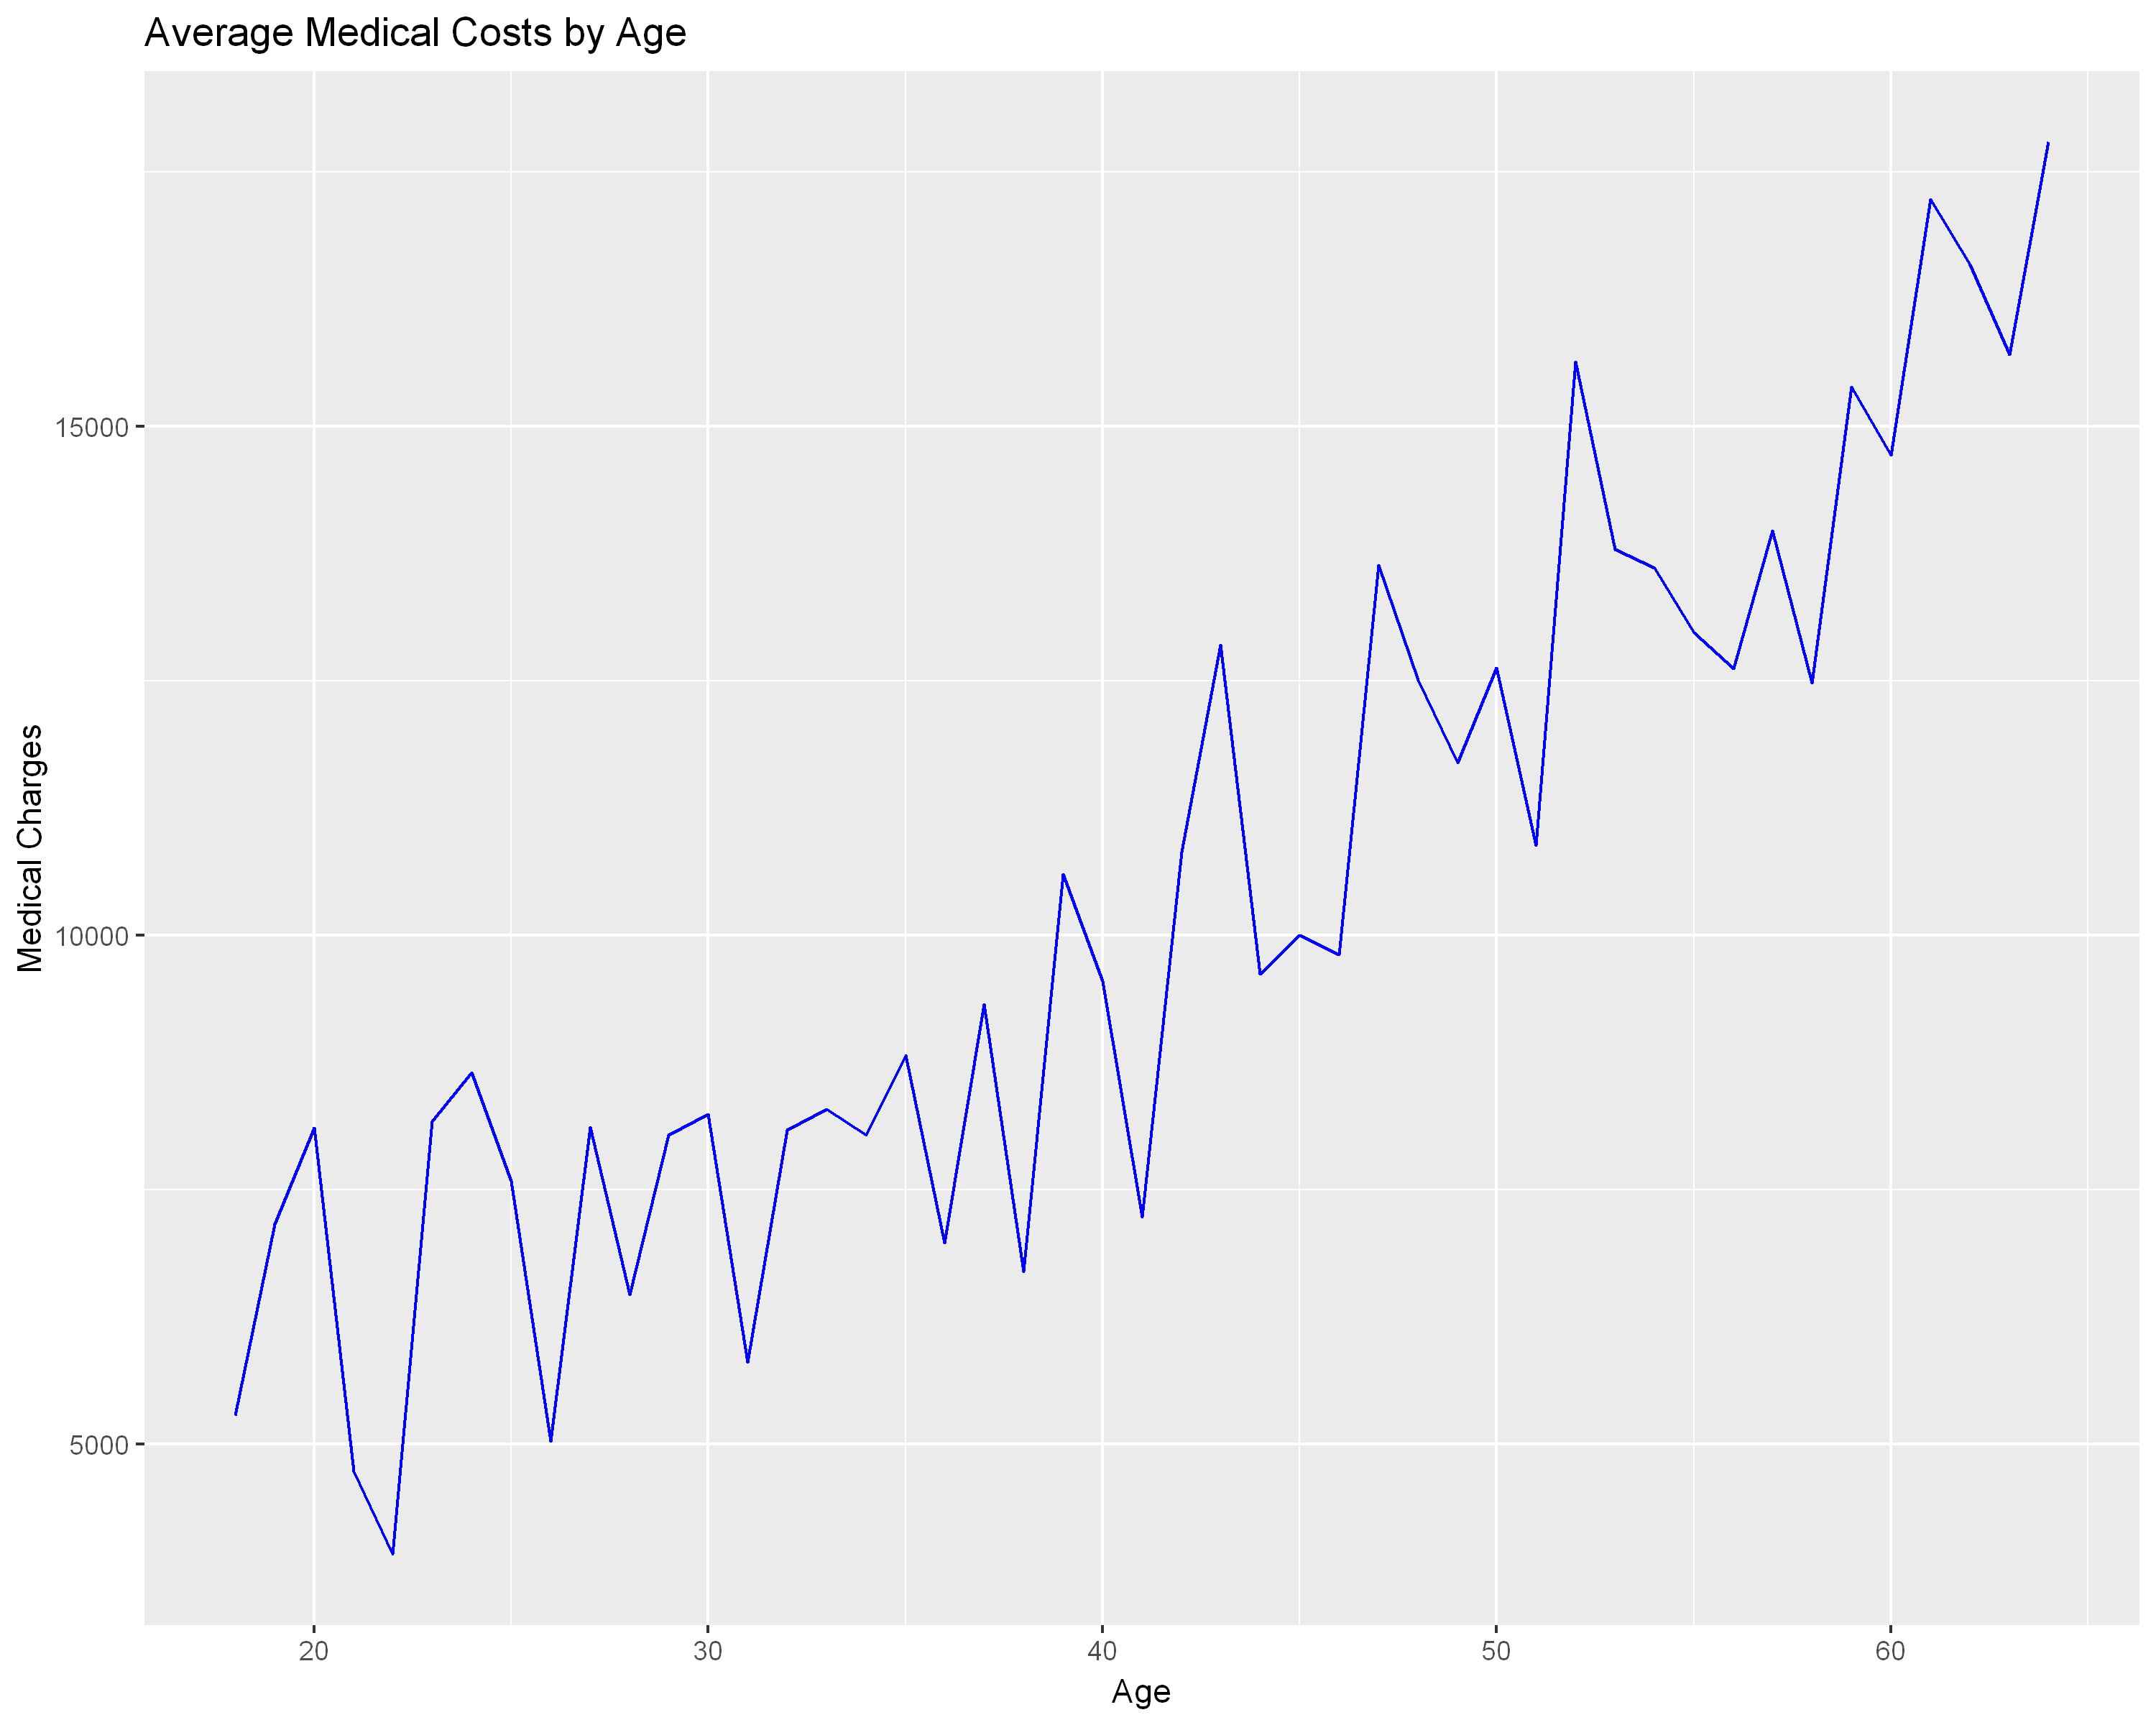

In [13]:
# Group together by age
grouped_age <- group_by(ins_data, age)

# Get mean of medical charges for each age group
age_sum <- summarize(grouped_age, mean_charges = mean(charges))

options(repr.plot.width = 10, repr.plot.height = 8, repr.plot.res = 300)

ggplot(data = age_sum, aes(x = age, y = mean_charges)) +
  geom_line(color="blue") +
  labs(title = "Average Medical Costs by Age", x = "Age", y = "Medical Charges")

The line plot shows that over time medical costs begin to increase with age.

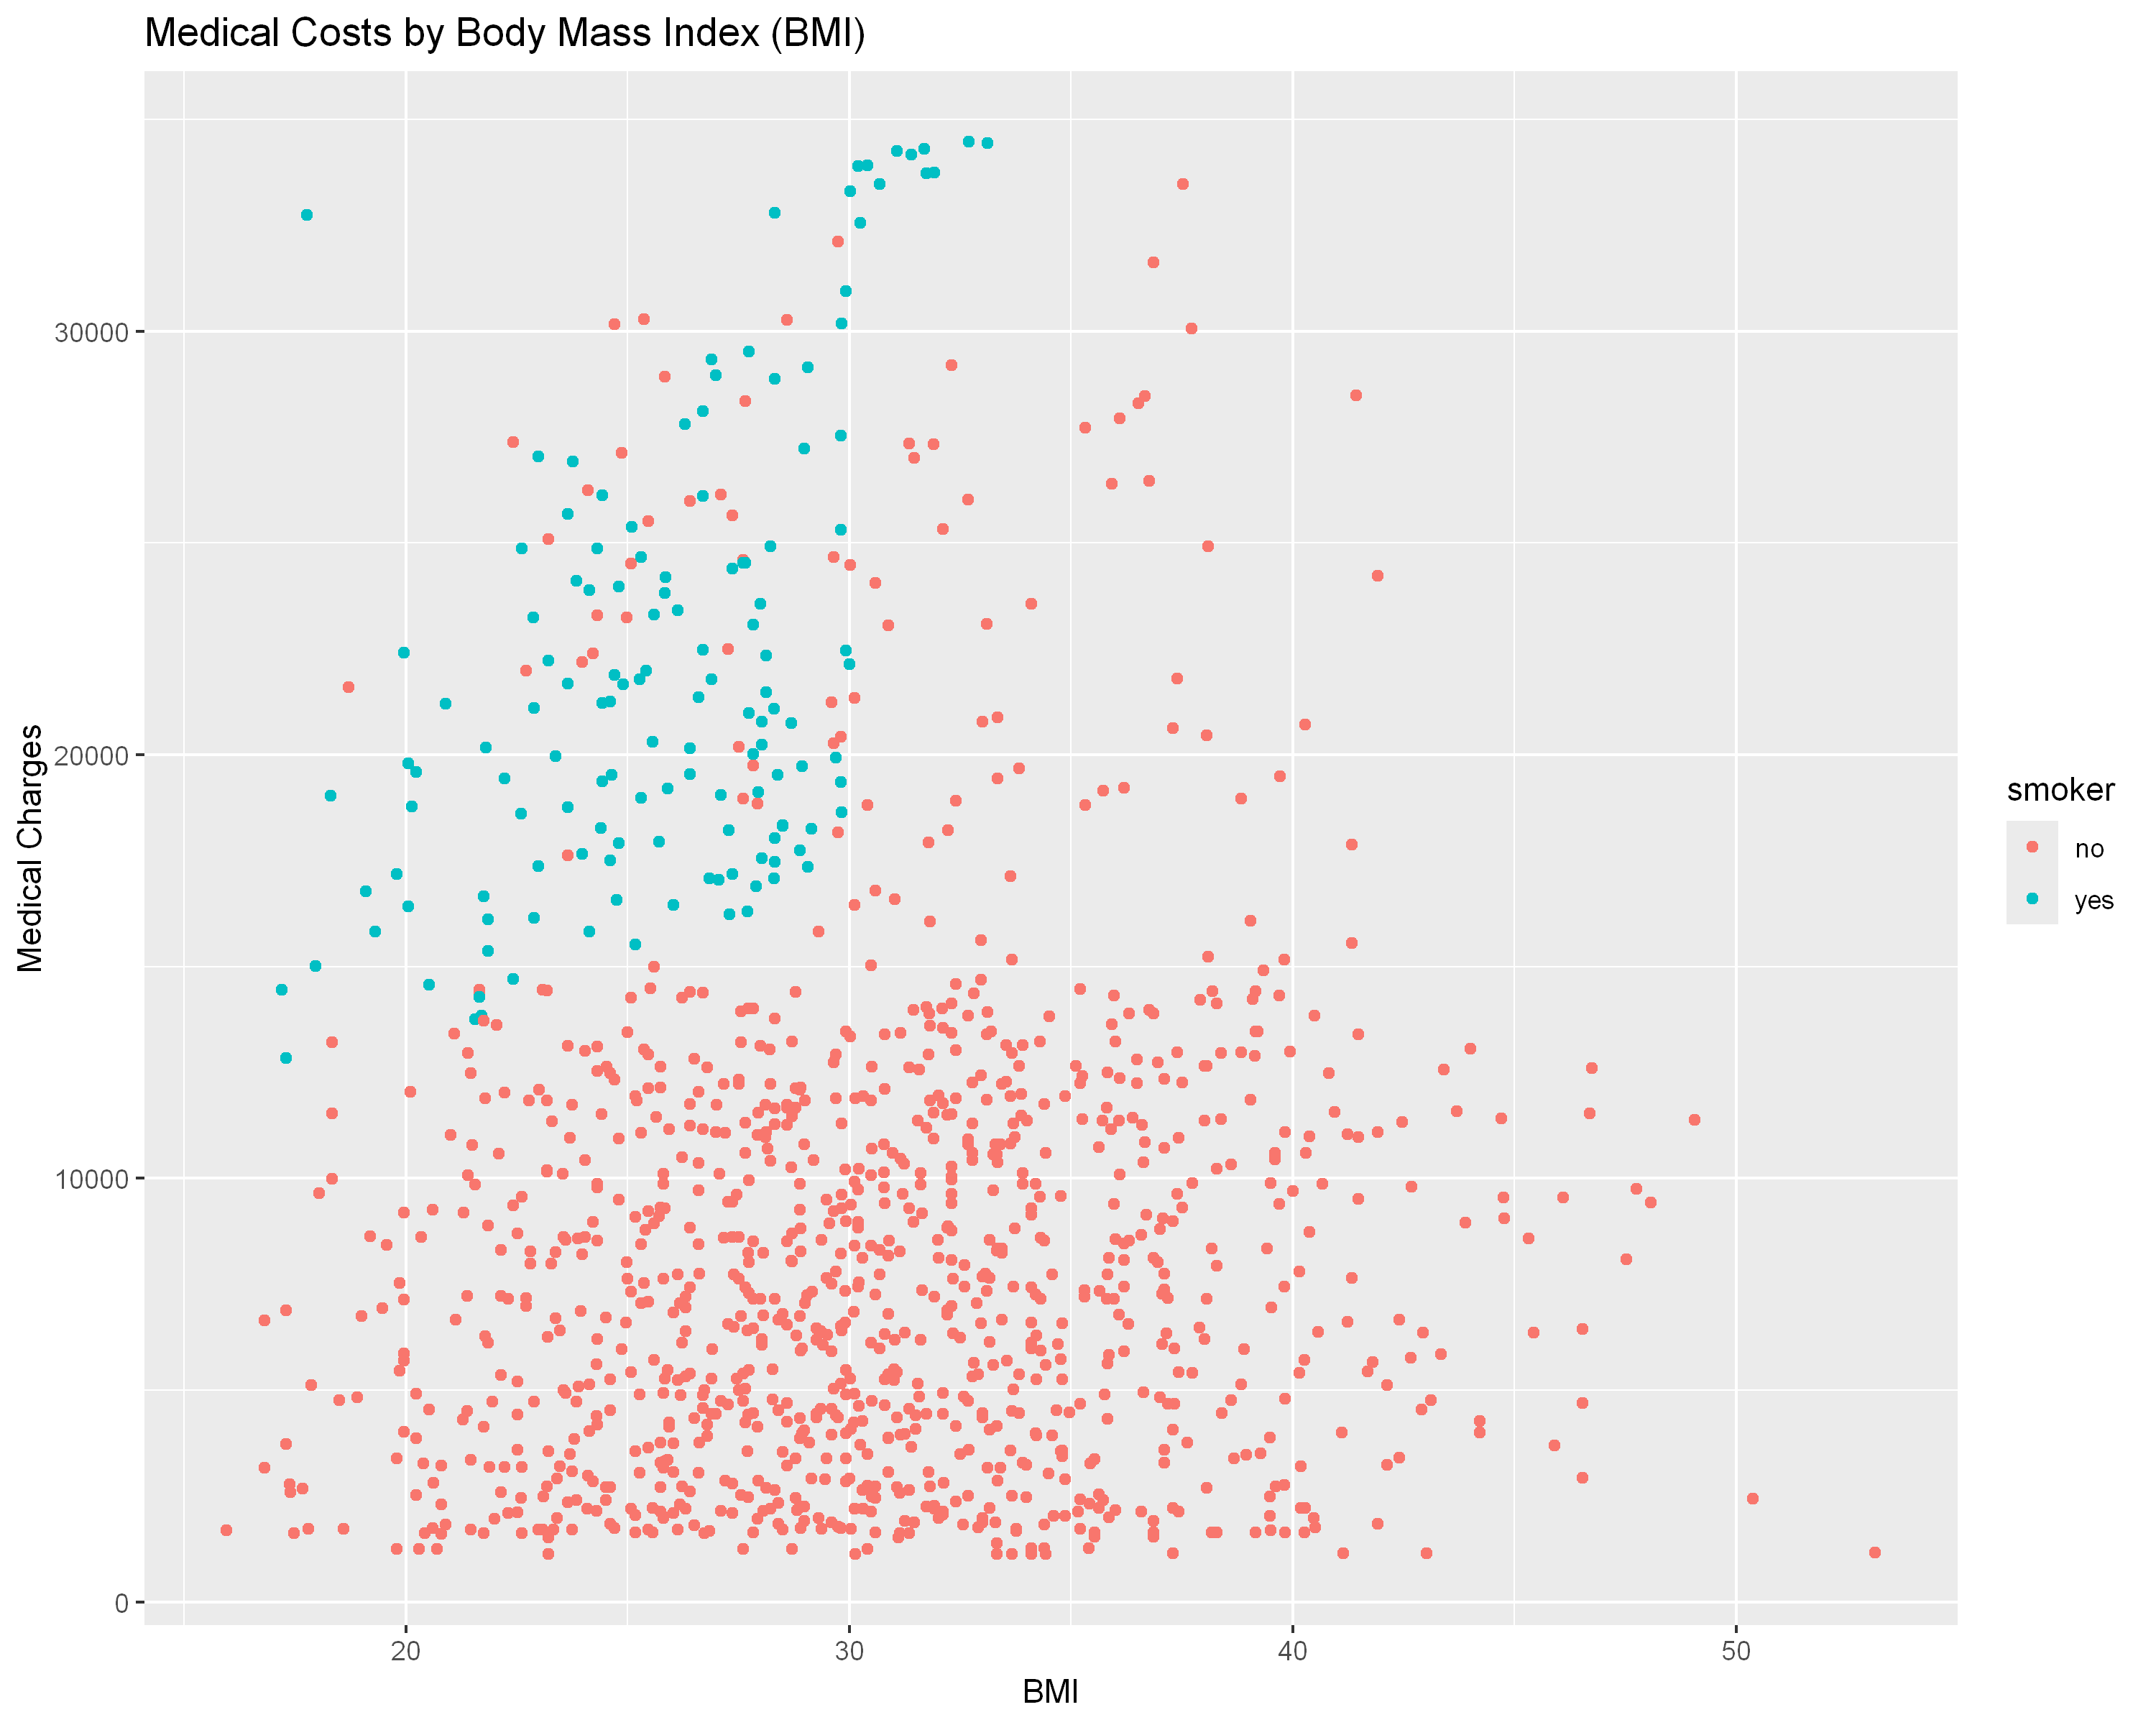

In [14]:
options(repr.plot.width = 10, repr.plot.height = 8, repr.plot.res = 300)

# Plot BMI to medical charges by smoker status
ggplot(data = ins_data, aes(x = bmi, y = charges, color = smoker)) +
  geom_point() +
  labs(title = "Medical Costs by Body Mass Index (BMI)", x = "BMI", y = "Medical Charges")

There is a weak correlation between body mass index (BMI) and medical charges. When grouping by smoker status, we can see that the majority of non-smokers regardless of BMI had medical charges of 15,000 USD or less. The majority of smokers had charges above 15,000 USD.

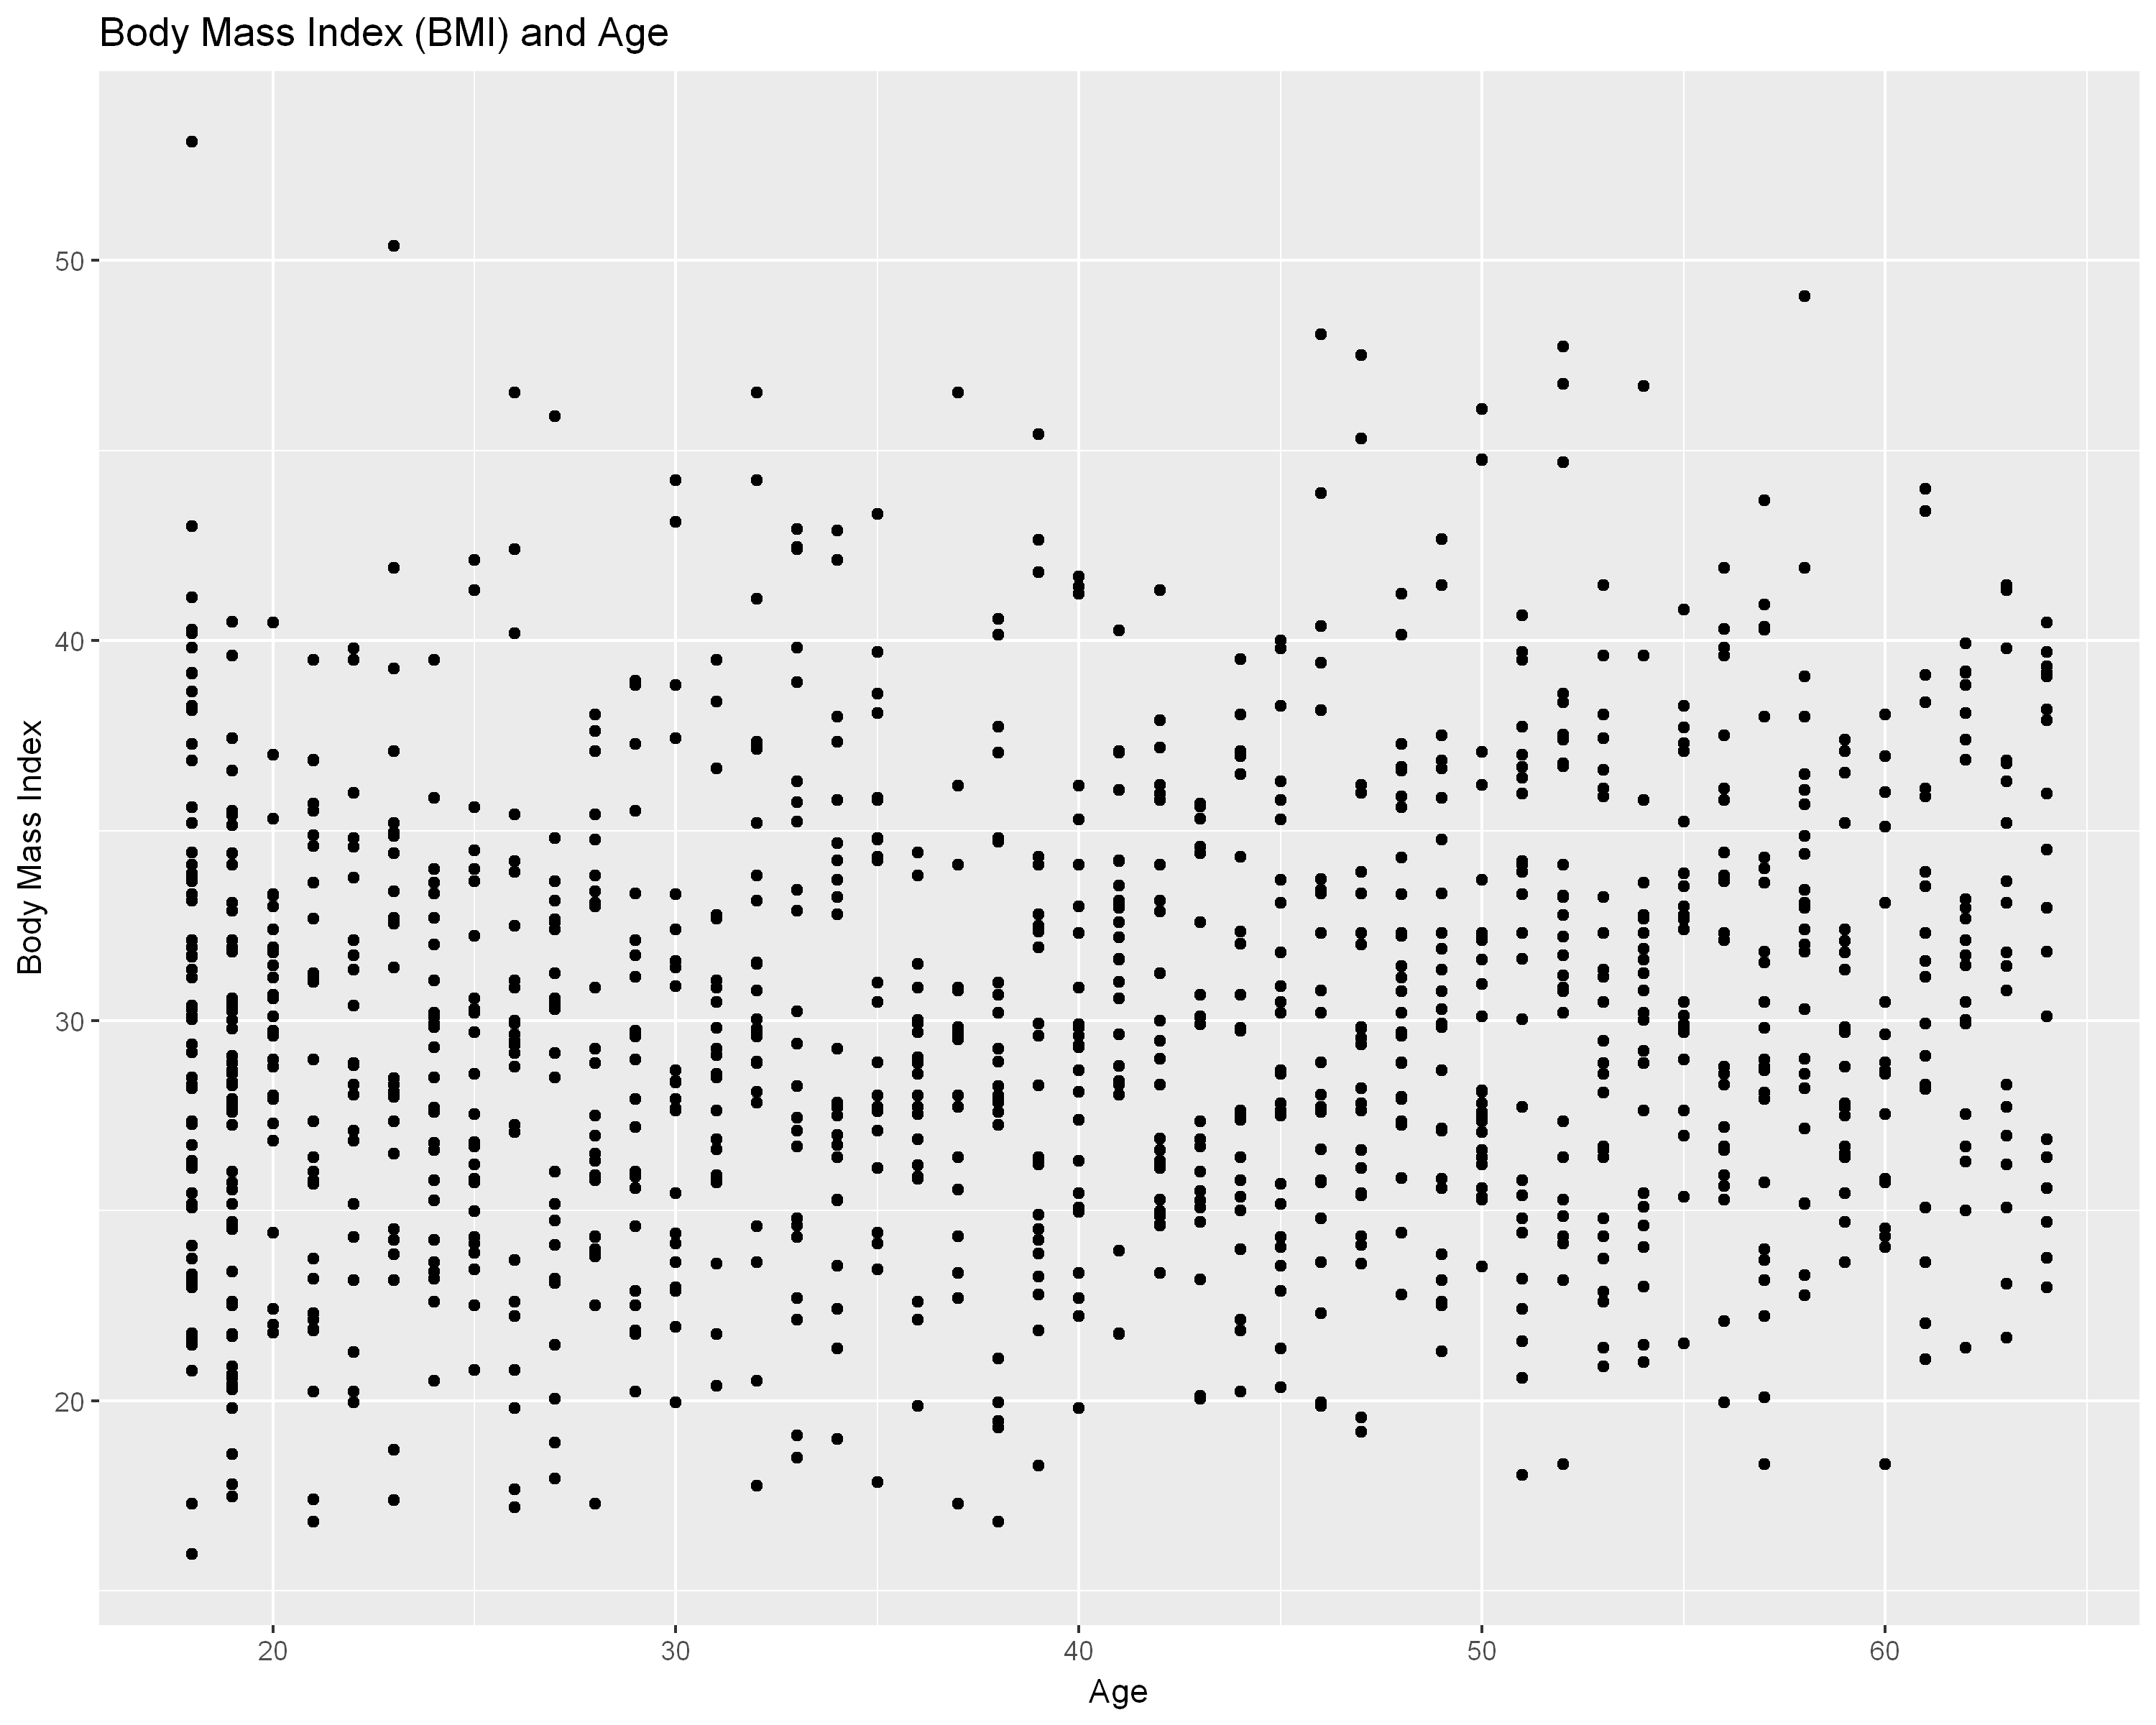

In [15]:
options(repr.plot.width = 10, repr.plot.height = 8, repr.plot.res = 300)

# Plot BMI to medical charges by smoker status
ggplot(data = ins_data, aes(x = age, y = bmi)) +
  geom_point() +
  labs(title = "Body Mass Index (BMI) and Age", x = "Age", y = "Body Mass Index")

The data does not indicate a strong relationship between BMI and age. The visualization shows an even distribution which confirms the 0.12 correlation coefficient for BMI and age.

### Do medical costs differ between males and females?

sex,average_cost
<chr>,<dbl>
female,10100.424
male,9747.728


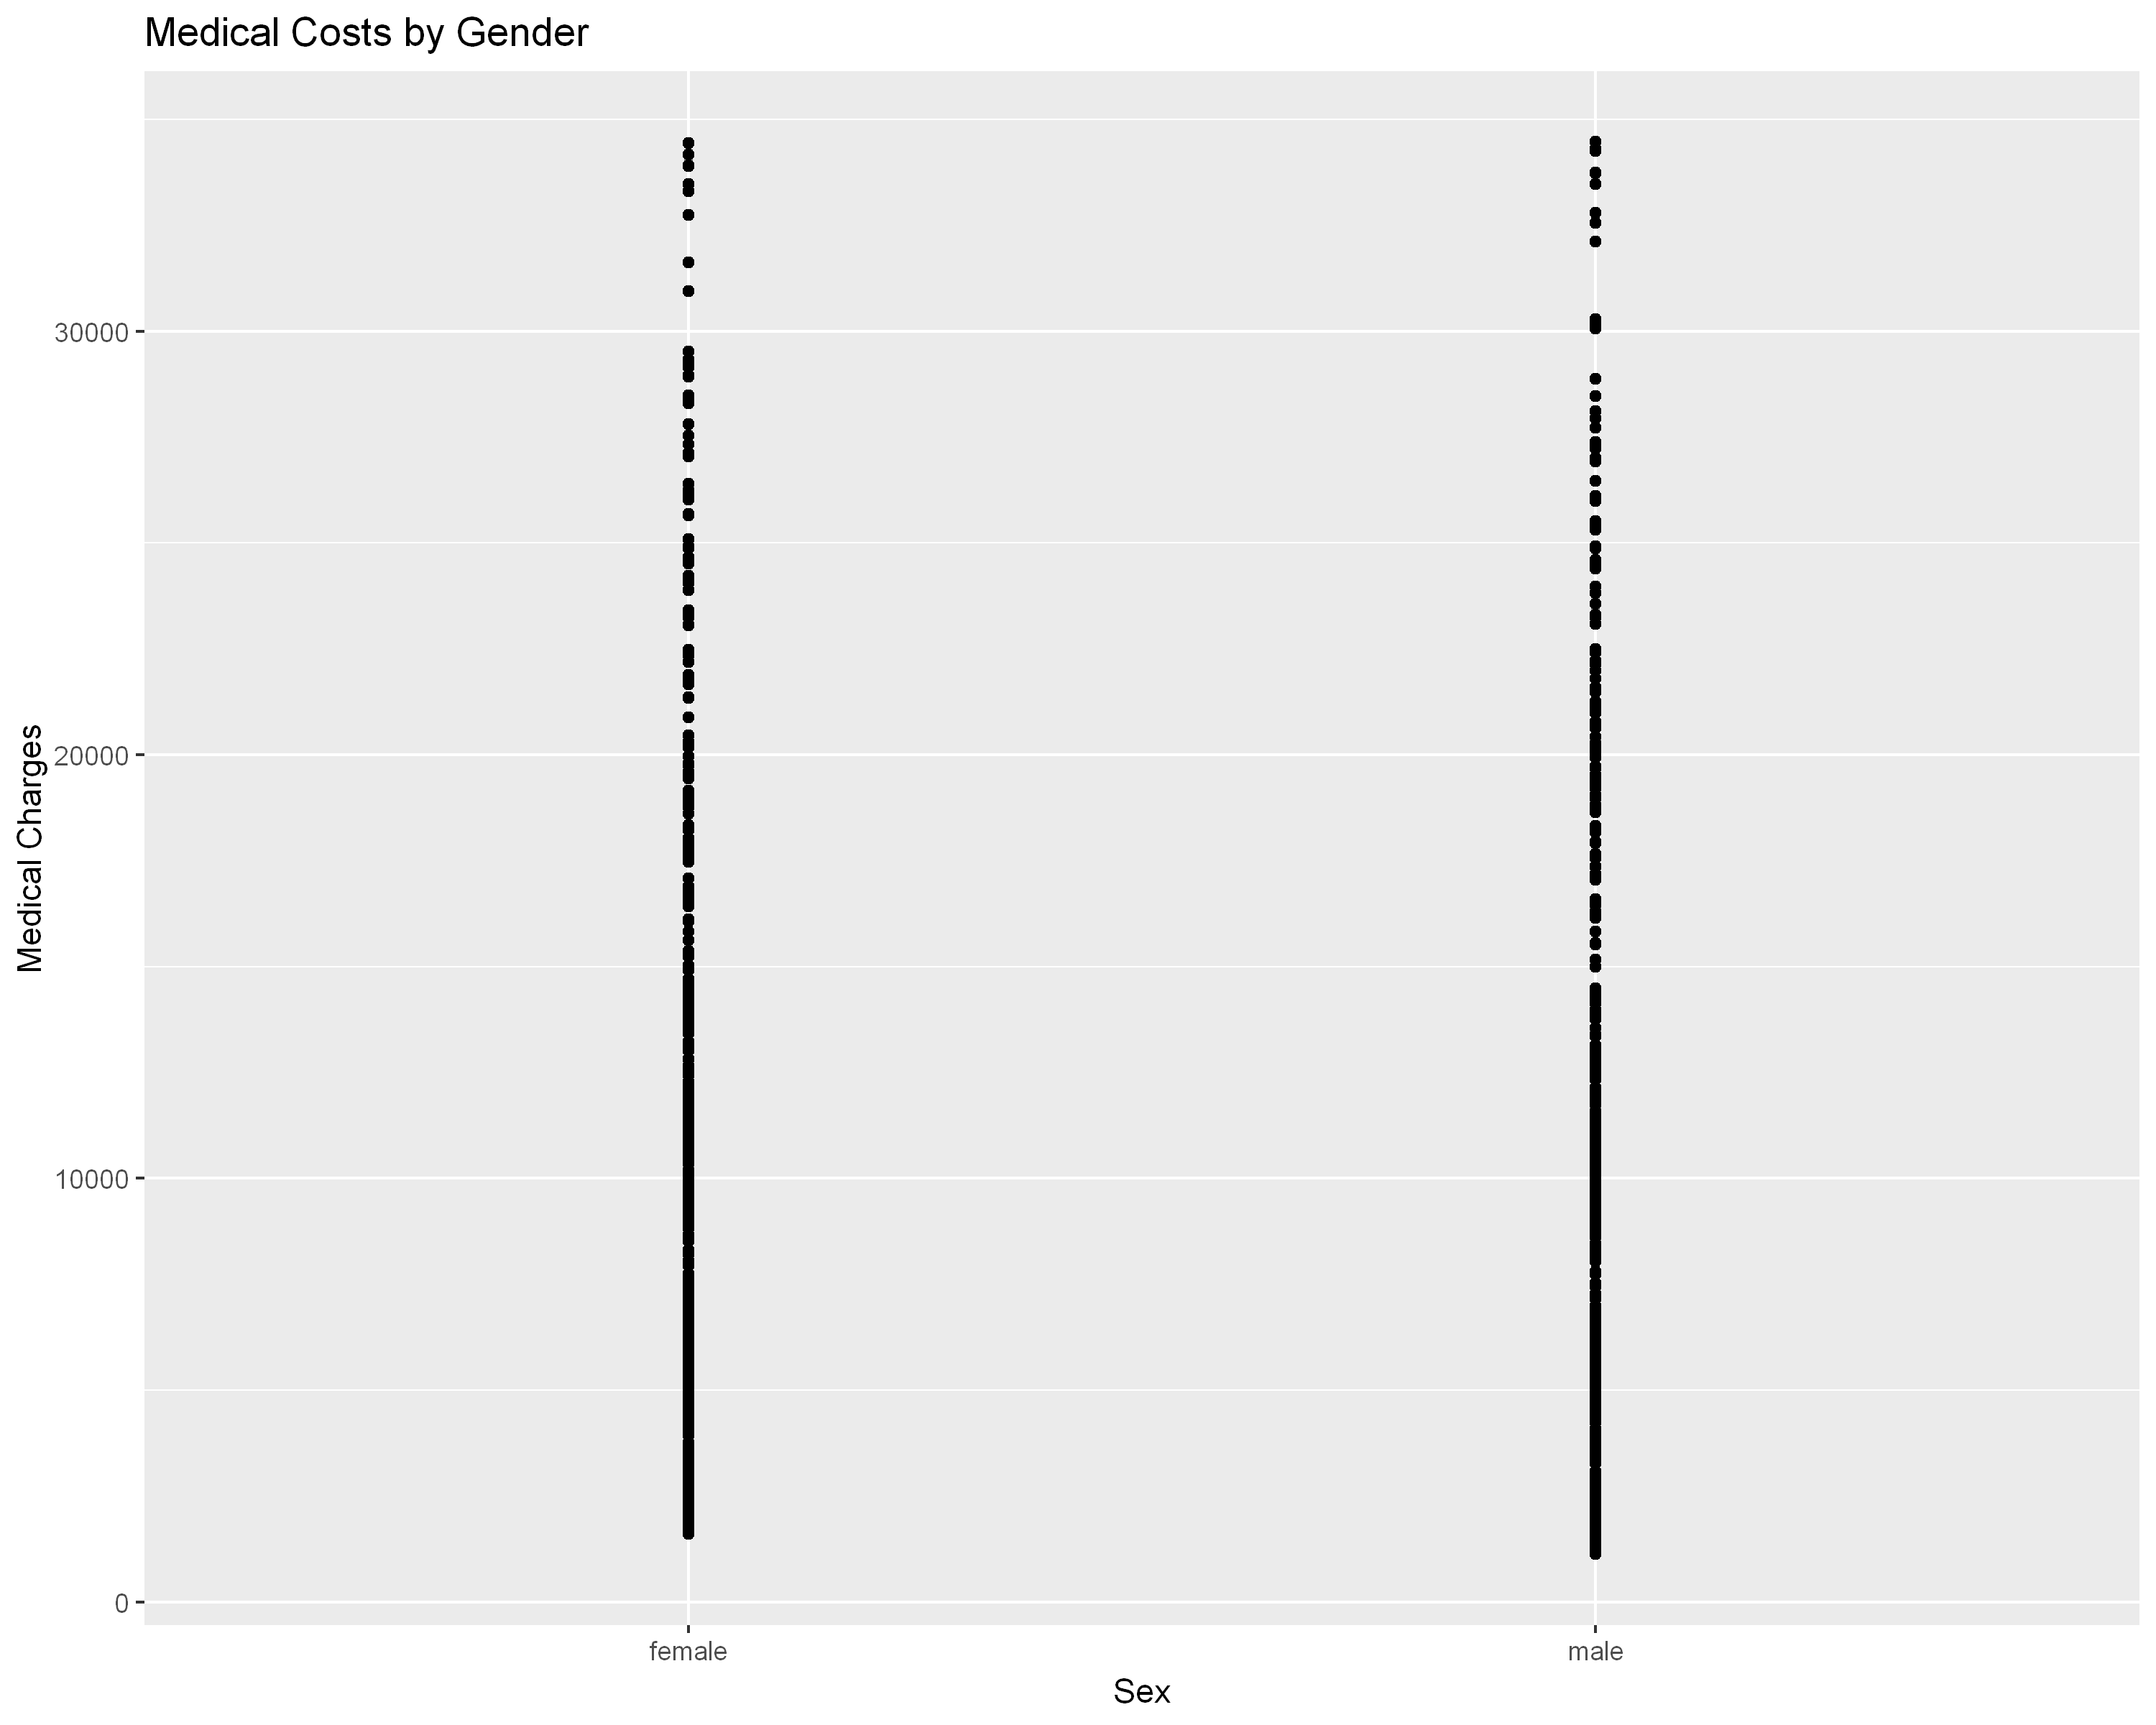

In [16]:
grouped_gen <- group_by(ins_data, sex)

gen_sum <- summarize(grouped_gen, average_cost = mean(charges))

gen_sum

options(repr.plot.width = 10, repr.plot.height = 8, repr.plot.res = 300)

# Plot BMI to medical charges by gender and age
ggplot(data = ins_data, aes(x = sex, y = charges)) +
  geom_point() +
  labs(title = "Medical Costs by Gender", x = "Sex", y = "Medical Charges")

The mean average for medical costs between females and males shows the average cost for females is 352.69 USD higher. This insignificant difference will be confirmed with the Welch Two Sample t-test.

Null Hypothesis (H0): The mean medical costs for males and females are equal.
H0: μ_male = μ_female

Alternative Hypothesis (Ha): The mean medical costs for males and females are not equal.
Ha: μ_male ≠ μ_female

In [17]:
# Subset data for males and females
male_costs <- ins_data$charges[ins_data$sex == "male"]
female_costs <- ins_data$charges[ins_data$sex == "female"]

t_test_result <- t.test(male_costs, female_costs)

t_test_result


	Welch Two Sample t-test

data:  male_costs and female_costs
t = -0.84226, df = 1188.7, p-value = 0.3998
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -1174.271   468.879
sample estimates:
mean of x mean of y 
 9747.728 10100.424 


With a p-value of 0.3998, we fail to reject the null hypothesis: The mean medical costs for males and females are equal.

### Conclusion

There is a strong correlation between smoker status, age and medical charges. Analysis of medical charges indicates that medical costs increase with age as well as for those who are smokers.

Body mass index and sex do not have significant relationships with an individual's healthcare costs. 

Regionally, medical costs appear to be higher in the Northeast and lower in the Southern region.